In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
%matplotlib inline

from glob import glob

In [2]:
female = glob('./data/crop/female_crop/*.png')
male = glob('./data/crop/male_crop/*.png')
path = female + male

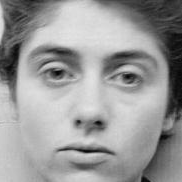

In [10]:
# get the size of image
def getSize(path):
    img = Image.open(path)
    return img.size[0]

Image.open(path[0])

In [4]:
# create DataFrame
df = pd.DataFrame(data=path,columns=['path'])
df.head() # display top 5 rows

,path
0,./data/crop/female_crop/female_3502.png
1,./data/crop/female_crop/female_1315.png
2,./data/crop/female_crop/female_1473.png
3,./data/crop/female_crop/female_5615.png
4,./data/crop/female_crop/female_3264.png


In [5]:
df['size'] = df['path'].apply(getSize)
df.head()

,path,size
0,./data/crop/female_crop/female_3502.png,182
1,./data/crop/female_crop/female_1315.png,122
2,./data/crop/female_crop/female_1473.png,54
3,./data/crop/female_crop/female_5615.png,182
4,./data/crop/female_crop/female_3264.png,273


### EDA

In [35]:
df.describe()

,size
count,6058.000000
mean,154.270716
std,71.632300
min,24.000000
25%,81.000000
50%,122.000000
75%,182.000000
max,410.000000


<AxesSubplot:>

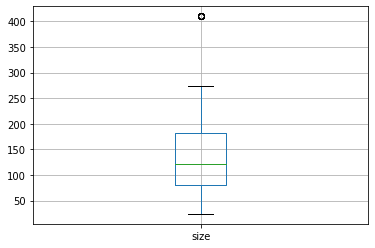

In [12]:
df.boxplot(column = 'size')

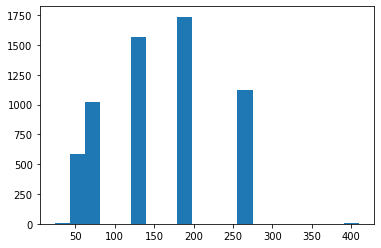

In [17]:
plt.hist(df['size'],bins=20)
plt.show()

Let's resize all the image in 100 x 100 and remove image with size less or equal 54.

In [15]:
df_new = df[df['size'] > 54]
df_new

,path,size
0,./data/crop/female_crop/female_3502.png,182
1,./data/crop/female_crop/female_1315.png,122
3,./data/crop/female_crop/female_5615.png,182
4,./data/crop/female_crop/female_3264.png,273
5,./data/crop/female_crop/female_1467.png,122
...,...,...
6052,./data/crop/male_crop/male_1383.png,81
6053,./data/crop/male_crop/male_3580.png,182
6054,./data/crop/male_crop/male_34.png,182
6056,./data/crop/male_crop/male_391.png,273


In [20]:
string = df_new['path'][0]
def gender(string): 
    # for creating a column named gender
    try:
        return string.split('_')[0].split('/')[-1]
    except:
        return None
string

'./data/crop/female_crop/female_3502.png'

In [21]:
df['gender'] = df['path'].apply(gender)

female    0.592605
male      0.407395
Name: gender, dtype: float64


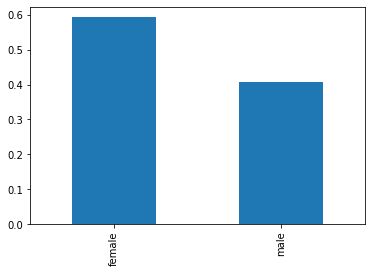

In [22]:
print(df['gender'].value_counts(normalize=True))
df['gender'].value_counts(normalize=True).plot(kind='bar')
plt.show()

### Resize image

Resizing all the image in `df_new` to 100 x 100 array

In [23]:
def resize_img(path_to_resize):
    try:
        img = cv2.imread(path_to_resize)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        size = gray.shape[0]

        if size >= 100: # shrink
            gray_re = cv2.resize(gray,(100,100),cv2.INTER_AREA) 
        else: # enlarge
            gray_re = cv2.resize(gray,(100,100),cv2.INTER_CUBIC)
        return gray_re.flatten()
    except:
        return None

# len(resize_img(path[0]))

In [26]:
df_new['gender'] = df_new['path'].apply(gender)
df_new.head()

/var/folders/3t/y4xtsjrj6zd38g1zv_sfrz900000gn/T/ipykernel_53851/4180963935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['gender'] = df_new['path'].apply(gender)


,path,size,gender
0,./data/crop/female_crop/female_3502.png,182,female
1,./data/crop/female_crop/female_1315.png,122,female
3,./data/crop/female_crop/female_5615.png,182,female
4,./data/crop/female_crop/female_3264.png,273,female
5,./data/crop/female_crop/female_1467.png,122,female


In [31]:
# structuring function
df_new['structure_data'] = df_new['path'].apply(resize_img)
df_new['structure_data']

/var/folders/3t/y4xtsjrj6zd38g1zv_sfrz900000gn/T/ipykernel_53851/191357511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['structure_data'] = df_new['path'].apply(resize_img)


0       [126, 116, 104, 97, 98, 95, 85, 79, 81, 81, 70...
1       [221, 221, 221, 221, 221, 222, 224, 225, 223, ...
3       [35, 35, 37, 41, 41, 40, 44, 43, 27, 14, 14, 1...
4       [53, 60, 71, 59, 38, 38, 52, 63, 55, 61, 55, 3...
5       [18, 19, 21, 21, 19, 17, 18, 25, 34, 48, 53, 5...
                              ...                        
6052    [109, 115, 119, 120, 116, 107, 98, 88, 81, 77,...
6053    [169, 157, 143, 138, 142, 145, 147, 139, 131, ...
6054    [216, 216, 216, 215, 216, 217, 216, 216, 218, ...
6056    [113, 148, 154, 156, 151, 116, 104, 103, 106, ...
6057    [12, 11, 15, 9, 13, 8, 8, 10, 9, 10, 12, 11, 7...
Name: structure_data, Length: 5460, dtype: object

In [32]:
# copy and expand their columns
df1 = df_new['structure_data'].apply(pd.Series)
df1


,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,126,116,104,97,98,95,85,79,81,81,...,142,143,147,151,156,152,157,162,165,167
1,221,221,221,221,221,222,224,225,223,220,...,160,37,27,31,14,59,159,106,51,150
3,35,35,37,41,41,40,44,43,27,14,...,34,34,34,34,34,34,34,34,34,33
4,53,60,71,59,38,38,52,63,55,61,...,84,84,84,84,84,84,84,84,84,85
5,18,19,21,21,19,17,18,25,34,48,...,71,73,73,72,80,86,84,89,93,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6052,109,115,119,120,116,107,98,88,81,77,...,17,24,58,115,167,175,173,175,175,163
6053,169,157,143,138,142,145,147,139,131,141,...,9,10,14,7,5,14,9,3,3,3
6054,216,216,216,215,216,217,216,216,218,219,...,63,60,57,55,53,51,58,68,73,71
6056,113,148,154,156,151,116,104,103,106,101,...,77,65,68,175,253,253,241,249,239,208


In [34]:
df2 = pd.concat((df_new['gender'],df1),axis=1)
df2.head()

,gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,female,126,116,104,97,98,95,85,79,81,...,142,143,147,151,156,152,157,162,165,167
1,female,221,221,221,221,221,222,224,225,223,...,160,37,27,31,14,59,159,106,51,150
3,female,35,35,37,41,41,40,44,43,27,...,34,34,34,34,34,34,34,34,34,33
4,female,53,60,71,59,38,38,52,63,55,...,84,84,84,84,84,84,84,84,84,85
5,female,18,19,21,21,19,17,18,25,34,...,71,73,73,72,80,86,84,89,93,99


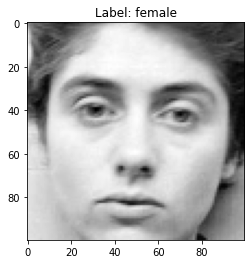

In [35]:
plt.imshow(df2.loc[0][1:].values.reshape(100,100).astype('int'),cmap='gray')
plt.title("Label: "+df2.loc[0]['gender'])
plt.show()

In [36]:
# save the data
import pickle 
pickle.dump(df2,open('./data/df_img_100_100.pickle','wb'))